In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
  os.mkdir('model')

print('tensorflow version:',tf.__version__)
!pip install tensorflow

tensorflow version: 2.7.0


In [4]:
def get_three_classes(x,y):
  indices_0, _ = np.where(y==0.)
  indices_1, _ = np.where(y==1.)
  indices_2, _ = np.where(y==2.)

  indices = np.concatenate([indices_0,indices_1,indices_2], axis=0)
  x = x[indices]
  y = y[indices]

  count=x.shape[0]
  indices = np.random.choice(range(count),count,replace=False)
  x = x[indices]
  y = y[indices]

  y = tf.keras.utils.to_categorical(y)
  return x,y

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

x_train,y_train = get_three_classes(x_train,y_train)
x_test,y_test = get_three_classes(x_test,y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


170508288/170498071 [==============================] - 2s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


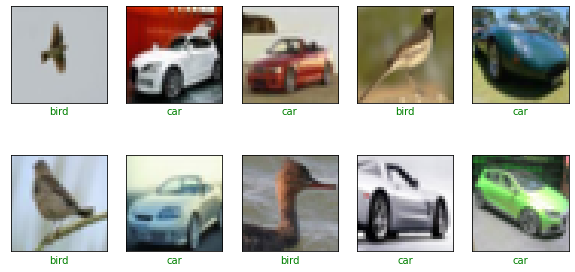

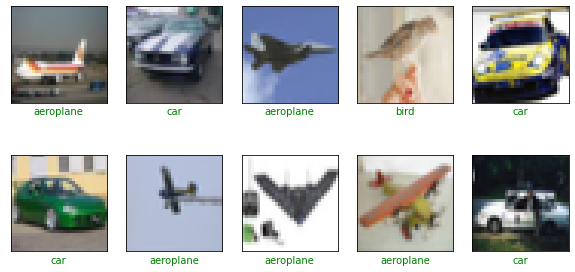

In [5]:
class_names = ['aeroplane','car','bird']
def show_random_examples(x,y,p) :
  indices = np.random.choice(range(x.shape[0]),10, replace=False)

  x = x[indices]
  y = y[indices]
  p = p[indices]
  
  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])

    col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
plt.show()

show_random_examples(x_train,y_train,y_train)
show_random_examples(x_test,y_test,y_test)



In [12]:
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense

def create_model():
  def add_cov_block(model,num_filters):
    model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(num_filters,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model

  model=tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))
  model=add_cov_block(model,32)
  model=add_cov_block(model,64)
  model=add_cov_block(model,128)

  model.add(Flatten())
  model.add(Dense(3,activation='softmax'))

  model.compile(
      loss = 'categorical_crossentropy',
      optimizer='adam',metrics=['accuracy']
  )

  return model

model=create_model()


In [13]:
h = model.fit(
    x_train/255.,y_train,
    validation_data = (x_train/255.,y_train),
    epochs=10,batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping
               (monitor = 'val_accuracy', patience=3),
              tf.keras.callbacks.ModelCheckpoint
               ('model/model_{val_accuracy:.3f}.h5',
                save_best_only = True,
                save_weights_oly =False,
                monitor = 'val_accuracy')
                                        ]
)

Epoch 1/10
118/118 [==============================] - 110s 921ms/step - loss: 0.8753 - accuracy: 0.6849 - val_loss: 1.8354 - val_accuracy: 0.5109
Epoch 2/10
118/118 [==============================] - 110s 931ms/step - loss: 0.5491 - accuracy: 0.7827 - val_loss: 2.5097 - val_accuracy: 0.5495
Epoch 3/10
118/118 [==============================] - 107s 909ms/step - loss: 0.4877 - accuracy: 0.8049 - val_loss: 1.5928 - val_accuracy: 0.4545
Epoch 4/10
118/118 [==============================] - 109s 921ms/step - loss: 0.4453 - accuracy: 0.8247 - val_loss: 0.8008 - val_accuracy: 0.6649
Epoch 5/10
118/118 [==============================] - 109s 928ms/step - loss: 0.4109 - accuracy: 0.8401 - val_loss: 0.3816 - val_accuracy: 0.8489
Epoch 6/10
118/118 [==============================] - 109s 922ms/step - loss: 0.3867 - accuracy: 0.8498 - val_loss: 0.3265 - val_accuracy: 0.8719
Epoch 7/10
118/118 [==============================] - 108s 920ms/step - loss: 0.3545 - accuracy: 0.8598 - val_loss: 0.2924 -

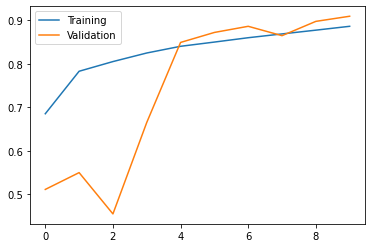

In [14]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs,label='Training')
plt.plot(range(len(accs)), val_accs,label='Validation')
plt.legend()
plt.show()

In [16]:
model = tf.keras.models.load_model('model/model_0.909.h5')

In [17]:
preds = model.predict(x_test/255.)

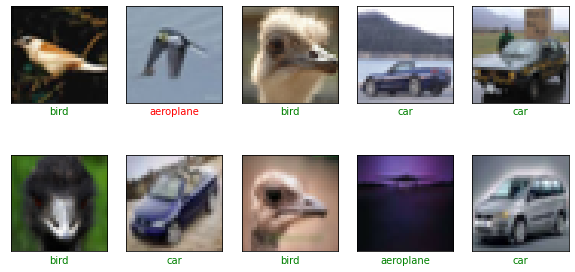

In [18]:
show_random_examples(x_test,y_test,preds)